In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectral_analysis as sa
from math import floor

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

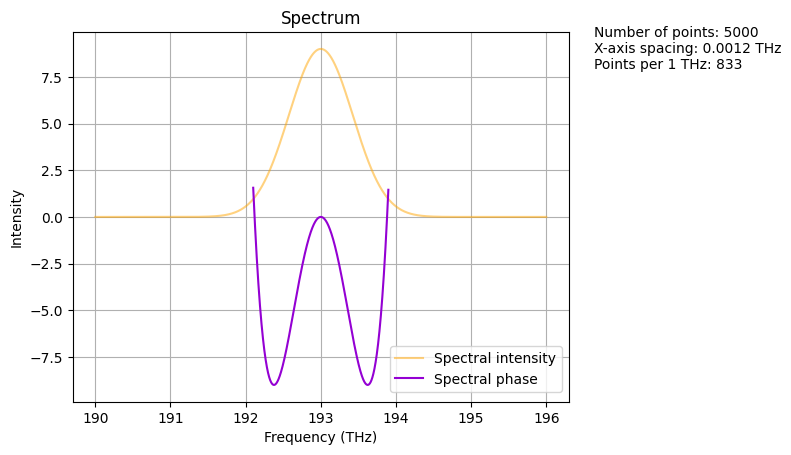

In [22]:
pulse = sa.hermitian_pulse(0, [190, 196], 193, 1, num = 5000)
phase = np.linspace(-2.5, 2.5, 1500)
phase = np.concatenate([np.zeros(1750), phase, np.zeros(1750)])
phase = phase**4-6*phase**2
phase = np.exp(1j*phase)
pulse.Y = pulse.Y * phase

sa.plot(pulse, what_to_plot = "trigonometric")

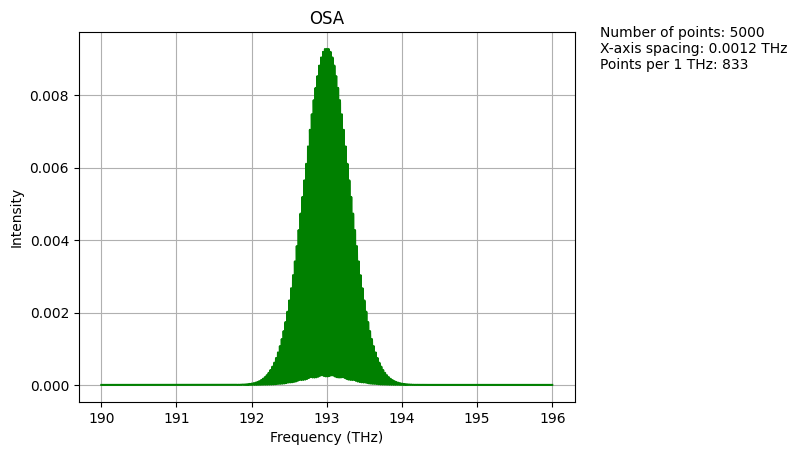

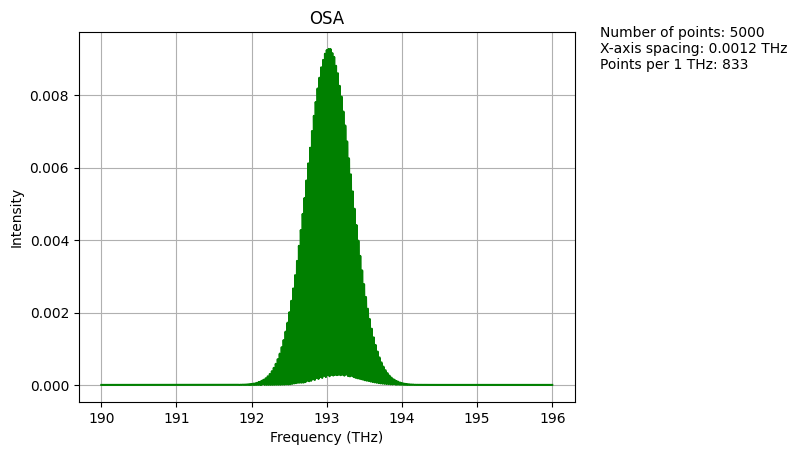

In [23]:
zero_pulse = pulse.copy()
zero_pulse.Y *= 0

for i in range(2):
    my_beam = sa.beam(pulse.copy(), zero_pulse.copy())
    my_beam.rotate(np.pi/4)
    my_beam.delay("ver", 40)
    if i == 1:
        my_beam.shear(0.05, "ver")
    my_beam.rotate(np.pi/4*0.8)
    my_beam.polarizer("ver")
    if i == 0:
        t_spectrum = my_beam.OSA()
    else:
        p_spectrum = my_beam.OSA()

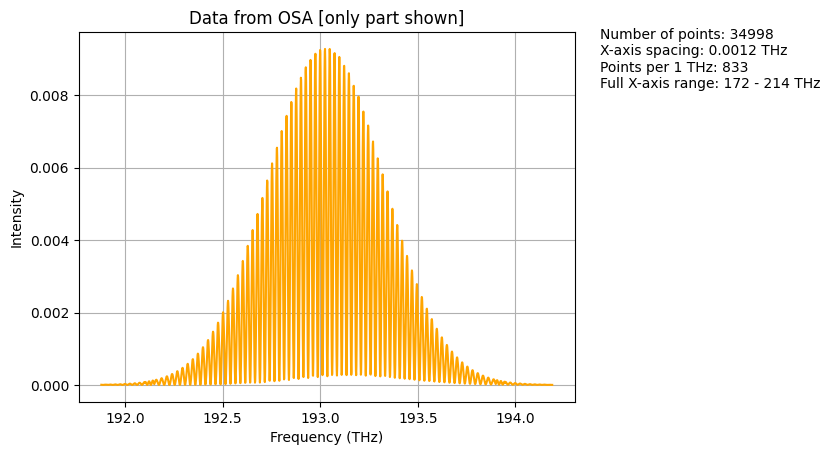

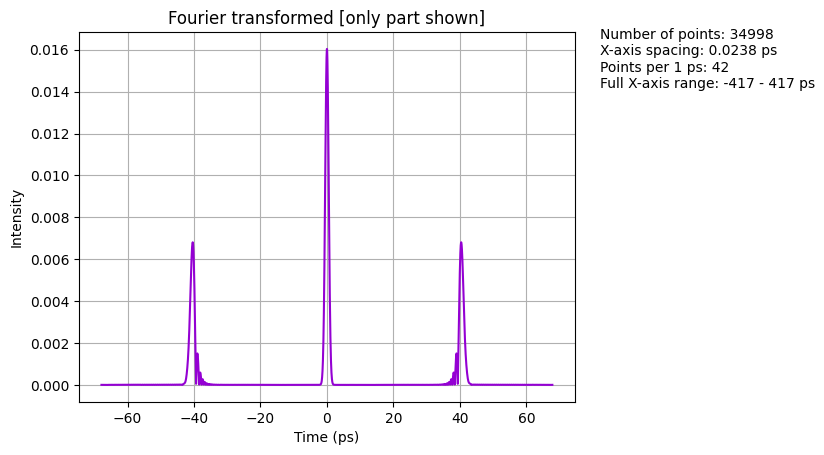

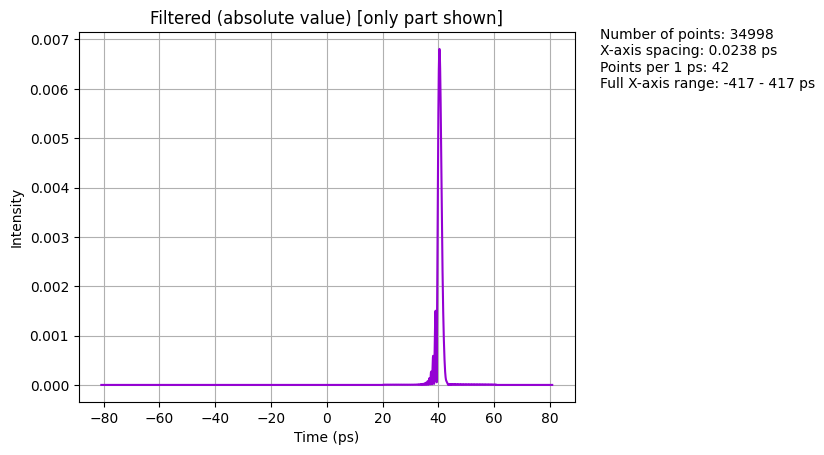

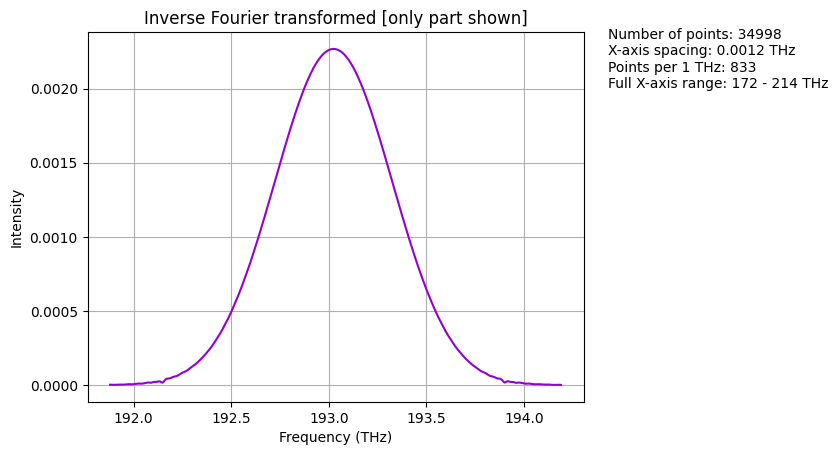

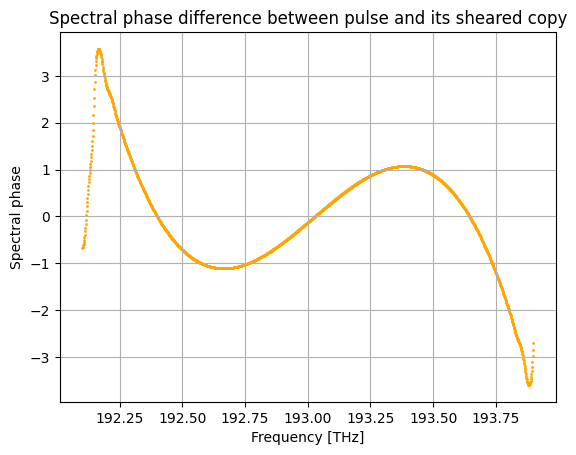

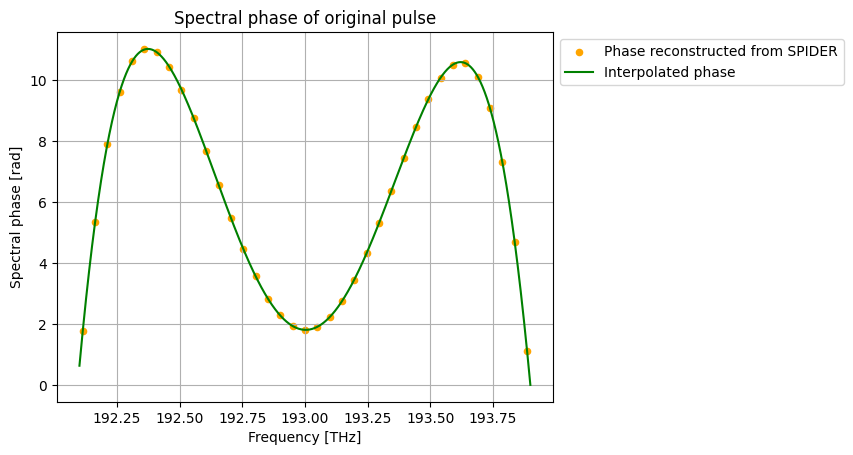

In [24]:
sa.spider(p_spectrum,
          t_spectrum,
          shear = 0.05,
          plot_steps = True,
          plot_phase = True,
          phase_borders = [192.1, 193.9])